In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def imshow(img):
    plt.figure(figsize=(10, 7))
    plt.imshow(img[:,:,::-1])

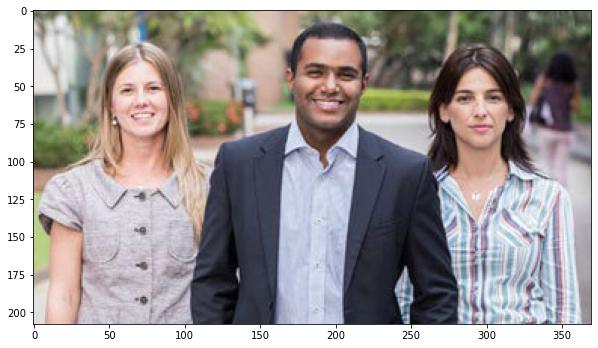

In [3]:
image = cv2.imread('img/people2.jpg');
imshow(image)

WaldoScene1.jpg WandoScene.jpg  cars2.jpg       people1.jpg
WaldoScene2.png alessio.png     cars3.jpg       people2.jpg
WaldoScene3.jpg cars1.jpg       chess.jpg       waldo.jpg


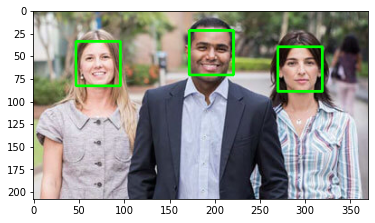

In [20]:
# Given the image above, lets detect faces on the image using haar cascades
# First create a CascadeClassifier using the frontalFace classifier -> 
# Haarcascades/haarcascade_frontalface_default.xml
img_copy = image.copy()
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Using the classifiers detect all faces on the image
faces = face_classifier.detectMultiScale(gray, scaleFactor=2.04, minNeighbors=5, flags=0, minSize=(1, 1), maxSize=(50, 50))

# If no faces detected print("No faces found")
'''When no faces detected, face_classifier returns and empty tuple'''
if len(faces) < 1:
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
'''We iterate through our faces array and draw a rectangle over each face in faces'''
for (x,y,w,h) in faces:
     new_img = cv2.rectangle(img_copy, (x,y), (x+w,y+h), (0, 255, 0), 2)

new_img = new_img[:,:,::-1]
plt.imshow(new_img)
    

No faces found


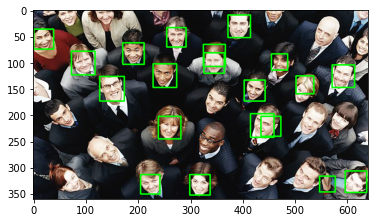

In [62]:

al = cv2.imread('img/alessio.png')
al_copy = al.copy()
face_classifier2 = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray2 = cv2.cvtColor(al_copy, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
faces2 = face_classifier2.detectMultiScale(gray2, scaleFactor=1.04, minNeighbors=3, flags=0, minSize=(1, 1), maxSize=(50, 50))
plt.imshow(gray2, cmap='gray')

if len(faces2) < 1:
    print("No faces found")

detect = np.ones((gray2.shape[:3]))
for (x,y,w,h) in faces2:
     detect = cv2.rectangle(al_copy, (x,y), (x+w,y+h), (0, 255, 0), 2)

#detect = detect[:,:,::-1]
plt.imshow(detect)

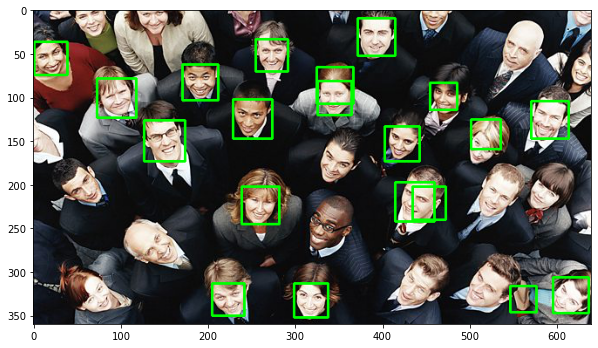

In [61]:

img2 = cv2.imread('img/people1.jpg')
al_copy = img2.copy()
face_classifier2 = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
# Convert the image to grayscale
gray2 = cv2.cvtColor(al_copy, cv2.COLOR_BGR2GRAY)
# Using the classifiers detect all faces on the image
faces = face_classifier2.detectMultiScale(gray2, scaleFactor=1.04, minNeighbors=1, flags=0, minSize=(2, 2), maxSize=(50, 50))
gray2.shape
# If no faces detected print("No faces found")
'''When no faces detected, face_classifier returns and empty tuple'''
if len(faces) < 1:
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
'''We iterate through our faces array and draw a rectangle over each face in faces'''
for (x,y,w,h) in faces:
     detect = cv2.rectangle(al_copy, (x,y), (x+w,y+h), (0, 255, 0), 2)


detect = detect[:,:,::-1]
plt.figure(figsize=(10, 10))
plt.imshow(detect)

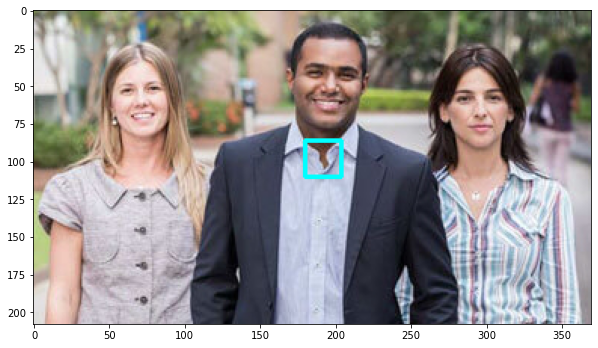

In [70]:
eye_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
# Now do the same but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml
img_copy3 = image.copy()
gray3 = cv2.cvtColor(img_copy3, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray3)

for (ex,ey,ew,eh) in eyes:
    detect3 = cv2.rectangle(img_copy3,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
detect3 = detect3[:,:,::-1]
plt.figure(figsize=(10, 10))
plt.imshow(detect3)    

In [71]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam
